## About Dataset
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Features**

|Feature|Feature_Type|Description|
|-----|-----|-----|
|age|numeric|age of a person|  
|anaemia |boolean|Decrease of red blood cells or hemoglobin |  
|creatinine_phosphokinase|numeric|Level of the CPK enzyme in the blood (mcg/L)|  
|diabetes|boolean| If the patient has diabetes | 
|ejection_fraction|numeric| Percentage of blood leaving the heart at each contraction(percentage) |  
|high_blood_pressure|boolean| If the patient has hypertension |  
|platelets|numeric| Platelets in the blood (kiloplatelets/mL)|  
|serum_creatinine|numeric| Level of serum creatinine in the blood (mg/dL)|  
|serum_sodium|numeric| Level of serum sodium in the blood (mEq/L)| 
|sex|boolean| Woman or man |  
|smoking|boolean| If the patient smokes or not |
|time|numeric|Follow-up period (days)|  


**Target variable:**  

|Feature|Feature_Type|Description|
|-----|-----|-----|
|DEATH_EVENT | boolean| If the patient deceased during the follow-up period |

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix


In [2]:
# upload dataset
data= pd.read_csv("heart_failure_clinical_records_dataset.csv")

# dataset shape
print("shape of data", data.shape)
data.head()

shape of data (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### check missing values

In [5]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

*There are no missing values*

### check class imbalance

percentage of NO and YES
 0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64


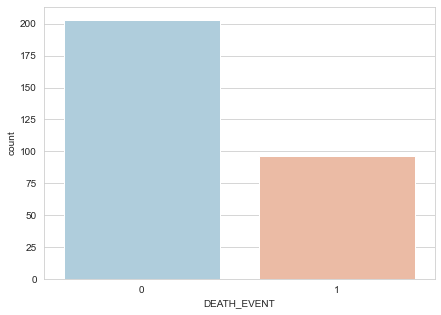

In [6]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.countplot(data["DEATH_EVENT"], palette= "RdBu_r" )

# percentage of class in target
print("percentage of NO and YES\n", data["DEATH_EVENT"].value_counts()/len(data)*100)

*The class distribution in the target variable is ~68:32 indicating an imbalance dataset*

### Feature selection

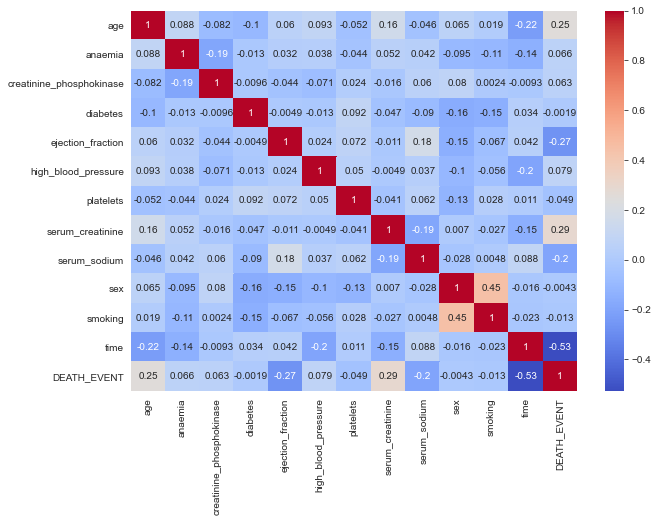

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap= "coolwarm")

### separating dependent and independent variables

In [8]:
# features
x= data.iloc[:, :-1]

# target
y= data.iloc[:, -1]

### performing oversampling to handle imbalanced target variable

In [9]:
# initialising oversampling
smote= SMOTETomek()

# implementing oversampling
x_sm, y_sm= smote.fit_sample(x,y)

In [10]:
x_sm.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
1,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
2,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8


### feature scaling

In [11]:
scaling= StandardScaler()

columns_to_scale= ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine",
                       "serum_sodium", "time"]
x_sm[columns_to_scale]=scaling.fit_transform(x_sm[columns_to_scale])

In [12]:
# scaled dataset
x_scaled= x_sm.copy()
x_scaled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.572926,0,7.156587,0,0.100510,0,0.017351,-0.390878,0.000000,1,0,-1.457337
1,-0.972779,1,-0.507269,0,-1.440078,0,-0.535271,0.308287,0.242771,1,0,-1.443988
2,2.226042,1,-0.570557,0,0.271686,1,-0.597412,0.483079,-0.971082,1,1,-1.430639
3,-0.173074,1,-0.305536,1,1.983451,0,1.991802,-0.390878,-1.213853,1,1,-1.403941
4,1.426336,1,-0.495402,0,-0.156255,1,1.308250,6.862966,-0.728312,1,1,-1.403941


### splitting into train and test data

In [13]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y_sm, test_size=0.2, random_state= 10)

## Model Building


### Logistic Regression

In [29]:
# initialising logistic regression
lr= LogisticRegression()

# hyperparameter tuning
lr_params= {"C": 10.0**np.arange(-2,3),
            "penalty": ["l1", "l2"],
            "max_iter": [100, 1000, 2500, 5000]}

# defining stratified K fold cross validation
lr_cv= KFold(n_splits=5)

# using gridsearch for respective parameter
lr_gridsearch= GridSearchCV(estimator=lr, param_grid= lr_params, cv= lr_cv, scoring="f1_macro", n_jobs=-1, verbose=2)

# model fitting
lr_gridsearch.fit(x_train, y_train)

print("best score :", lr_gridsearch.best_score_)
print("best parameters :", lr_gridsearch.best_params_)
print("best estimaotrs :", lr_gridsearch.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


best score : 0.8185997703296982
best parameters : {'C': 1.0, 'max_iter': 100, 'penalty': 'l2'}
best estimaotrs : LogisticRegression()


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.5s finished


0.8852459016393442
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.90      0.87      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



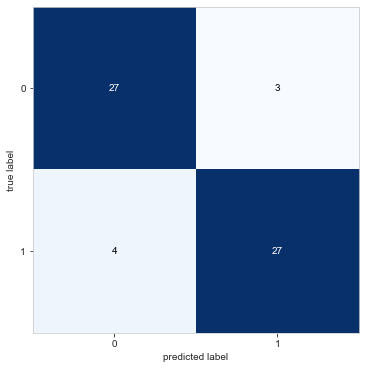

In [30]:
#best model
lr_grid= lr_gridsearch.best_estimator_

# checking model performance
lr_grid_pred= lr_grid.predict(x_test)

cm= confusion_matrix(y_test, lr_grid_pred)

plot_confusion_matrix(cm, figsize=(6,6))a
print(accuracy_score(y_test, lr_grid_pred))
print(classification_report(y_test, lr_grid_pred))

### Random Forest
*Since ensemble techniques does not require dataset to be scaled, we are using just oversampled data to split into train and test data.*

In [16]:
X_train, X_test, Y_train, Y_test= train_test_split(x_sm,y_sm, test_size=0.2, random_state=10 )

In [17]:
#. initialising random forest classifier
classifier= RandomForestClassifier()

# hyperparameter tuning
params= {"n_estimators" : [int(x) for x in np.linspace(start= 100, stop= 1000, num=10)],
         "criterion" : ["gini", "entrpoy"],
         "max_depth" : [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
         "min_samples_split" : [1,5,10,15],
         "min_samples_leaf" : [2,3,5,6,7,],
         "max_features" : ["auto", "sqrt", "log2"]
         
        }

# defining KFold cross validation
cv= KFold(n_splits=5)

# using randomized gridsearch on respective hyperparameters
RandomSearch= RandomizedSearchCV(estimator=classifier, param_distributions= params, cv=cv,scoring="f1_macro",
                                 n_iter=100, n_jobs= -1,verbose=2,random_state=10)

# model fitting
RandomSearch.fit(X_train, Y_train)

print(RandomSearch.best_score_)
print(RandomSearch.best_params_)
print(RandomSearch.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.8min finished


0.8496909331071434
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 400, 'criterion': 'gini'}
RandomForestClassifier(max_depth=400, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=300)


0.9508196721311475
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.94      0.97      0.95        31

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



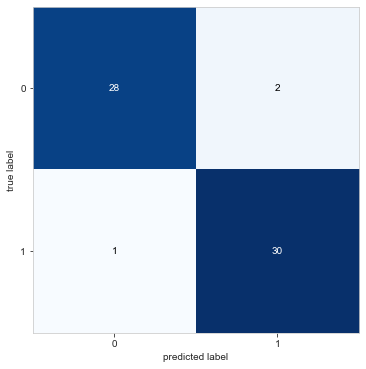

In [22]:
# best model
rf_randomSearch= RandomSearch.best_estimator_

# checking model performance
rf_random_pred= rf_randomSearch.predict(X_test)

cm= confusion_matrix(Y_test, rf_random_pred)

plot_confusion_matrix(cm, figsize=(6,6))
print(accuracy_score(Y_test, rf_random_pred))
print(classification_report(Y_test, rf_random_pred))

### Creating pickle file for *Random Forest model*

In [23]:
import pickle

# create pickle file with name classifier.pkl
pickle_out= open("classifier_heart.pkl", "wb")

# dumping rf_gridsearch classifier into above created pickle file
pickle.dump(rf_randomSearch, pickle_out)

pickle_out.close()

In [24]:
pickle_in= open("classifier_heart.pkl", "rb")
classifier= pickle.load(pickle_in)

In [25]:
classifier.predict([[57,1,115,0,25,1,181000,1.1,144,1,0,79]])

array([0])